# 10. 마라톤

정말 문제가 어려웠습니다. 모든 경우의 수를 살펴보면 시간 초과가 나기 때문에 몇 가지 스킬이 필요했던 거 같습니다. 나름 노력했으나, 절반이 넘는 테스트  케이스에서 시간 초과가 났습니다. 수업 인원 중 절반이 0점을 받은 문제 답습니다...

## 문제

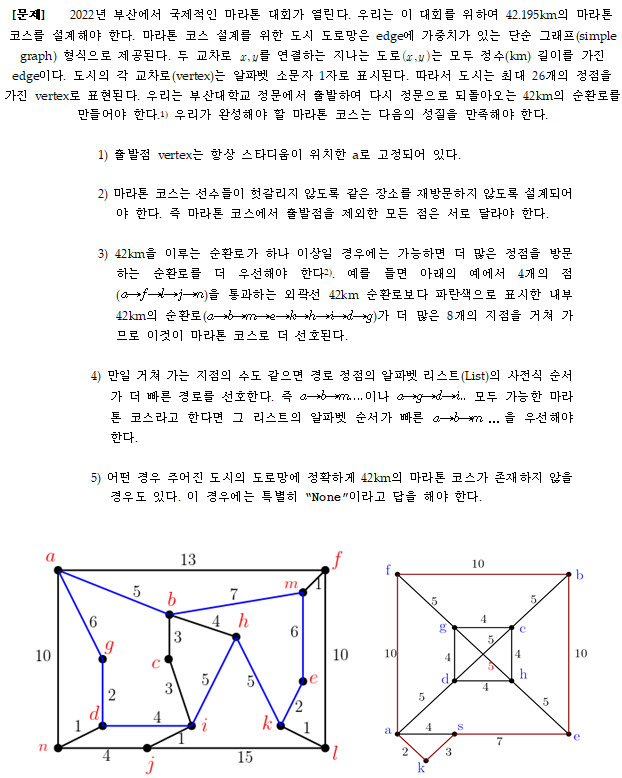

## 입출력

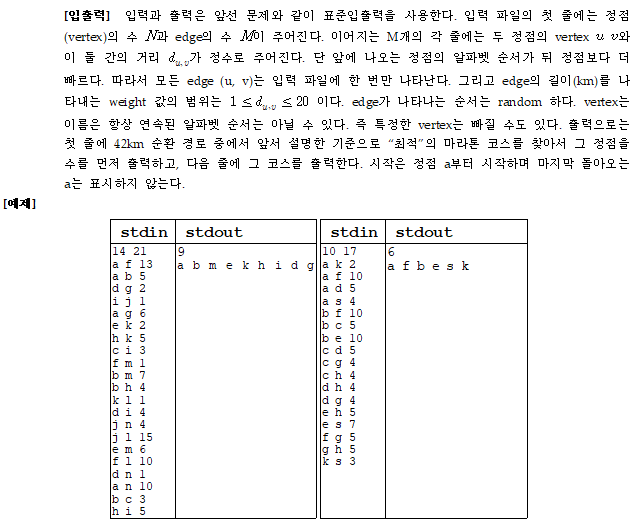

## 기본 세팅

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True) # gdrive 수정 가능하게 함 

Mounted at /content/drive/


In [ ]:
# 수정
add = "_10_마라톤(BackTracking)/"

PROJECT_DIR = "/content/drive/MyDrive/2022년/1학기/Computer_Algorithm/과제 파일/" + add

def inp_pth(i):
  return PROJECT_DIR + 'sample/0' + str(i) + '.inp'

def out_pth(i):
  return PROJECT_DIR + 'sample/0' + str(i) + '.out'

In [ ]:
def test():
  for i in range(1, 4):
    print(f"[{i}]")
    inp_path = inp_pth(i)
    with open(inp_path, 'r') as inp:
      input = inp.readlines()

    _, T, k = map(int, input[0].split())    
    class_ = WorkerReader(T, k)

    out_path = out_pth(i)
    with open(out_path) as out:
      answer = out.read()
    
    class_.input(input[1:])
    result = class_.out()
    print(f"{result == answer}\n result: {result} answer: {answer}")


In [ ]:
import numpy as np

## 풀이

In [ ]:
class Graph:
  def __init__(self, node_count):
    self.graph = np.zeros([node_count, node_count])
    self.char_int = {}
    self.i = 0
  

  def int_to_char(self, num):
    for key, value in self.char_int.items():
         if num == value:
             return key


  def assign_char_to_int(self, char):
    if not char in self.char_int.keys():
      self.char_int[char] = self.i
      self.i += 1


  def input(self, inp):
    for i in inp: self.add_edge(i)
  

  def add_edge(self, inp):
    inp = inp.split()

    self.assign_char_to_int(inp[0])
    self.assign_char_to_int(inp[1])

    node1 = self.char_int[inp[0]]
    node2 = self.char_int[inp[1]]                         
    length = int(inp[2])

    self.graph[node1, node2] = self.graph[node2, node1] = length

      
  def get_edge_list(self, num):
    row = np.where(self.graph[num, :] > 0)[0]
    return list(row)

  
  def at(self, i, j):
    return self.graph[i,j]

In [ ]:
class Stack:
  def __init__(self, node_count):
    self.graph = Graph(node_count)
    self.stack = []
  

  def input(self, inp):
    self.graph.input(inp)
  

  def search(self, stack = None, trace = None, tot = None, start = False):
    if start:
      stack = [self.graph.get_edge_list(0)]
      tot = 0
      trace = [0]
      self.result = []
      self.search(stack, trace, tot)

    else:
      for node in stack[-1]:
        if node == 0:
          if (tot + self.graph.at(node, trace[-1])) == 42:
            self.result.append(trace)

          continue

        elif node in trace:
          continue
        
        elif (tot + self.graph.at(node, trace[-1])) >= 42:
          continue
        
        elif node in self.graph.get_edge_list(trace[-1]):
          tot_ = tot
          trace_ = trace.copy()
          stack_ = stack.copy()

          tot_ += self.graph.at(node, trace_[-1])
          trace_.append(node)
          stack_[-1] = node
          stack_.append(self.graph.get_edge_list(node))
          self.search(stack_, trace_, tot_)


  def out(self):
    self.search(start = True)
    result = self.find_result()
    count = len(result.replace(" ", ""))
    print(count)
    print(result)

  def find_result(self):
    max_ = list(map(self.graph.int_to_char, self.result[0]))
    for i, r in enumerate(self.result[1:]):
      r = list(map(self.graph.int_to_char, r))
      if len(r) < len(max_): continue
      else:
        r_str = "".join(r)
        max_str = "".join(max_)
        
        if r_str < max_str:
          max_ = r
          
    return " ".join(max_)

  
  def print_trace(self):
    self.trace = list(map(self.graph.int_to_char, self.trace))
    print(self.trace)

  
  def check(self):
    return self.duplicate()

  def duplicate(self):
    firsts = []

    for item in self.stack:
      if item[0] in firsts:
        return True
      else:
        firsts.append(item[0])
    
    return False

  def isDuplicate(self, num):
    for item in self.stack:
      if item[0] == num:
        return True
    
    return False



In [ ]:
def test(n = 4):
  for i in range(1, n):
    print(f"[{i}]")
    inp_path = inp_pth(i)
    with open(inp_path, 'r') as inp:
      input = inp.readlines()

    node_count = int(input[0].split()[0])

    class_ = Stack(node_count)

    out_path = out_pth(i)
    with open(out_path) as out:
      answer = out.read()
    
    class_.input(input[1:])

    class_.out()
    print(f"(answer)\n{answer}")

In [ ]:
test()

[1]
9
a b m e k h i d g
(answer)
9
a b m e k h i d g 
[2]
6
a f b e s k
(answer)
6
a f b e s k 
[3]
10
a f m b h i j n d g
(answer)
10
a f m b h i j n d g 


## 최종 제출 파일

In [ ]:
import numpy as np

class Graph:
  def __init__(self, node_count):
    self.graph = np.zeros([node_count, node_count])
    self.char_int = {}
    self.i = 0
  

  def int_to_char(self, num):
    for key, value in self.char_int.items():
         if num == value:
             return key


  def assign_char_to_int(self, char):
    if not char in self.char_int.keys():
      self.char_int[char] = self.i
      self.i += 1


  def input(self, inp):
    for i in inp: self.add_edge(i)
  

  def add_edge(self, inp):
    inp = inp.split()

    self.assign_char_to_int(inp[0])
    self.assign_char_to_int(inp[1])

    node1 = self.char_int[inp[0]]
    node2 = self.char_int[inp[1]]                         
    length = int(inp[2])

    self.graph[node1, node2] = self.graph[node2, node1] = length

      
  def get_edge_list(self, num):
    row = np.where(self.graph[num, :] > 0)[0]
    return list(row)

  
  def at(self, i, j):
    return self.graph[i,j]


class Stack:
  def __init__(self, node_count):
    self.graph = Graph(node_count)
    self.stack = []
  

  def input(self, inp):
    self.graph.input(inp)
  

  def search(self, stack = None, trace = None, tot = None, start = False):
    if start:
      self.result = []
      self.search([self.graph.get_edge_list(0)], [0], 0)

    else:
      for node in stack[-1]:
        if node == 0:
          if (tot + self.graph.at(node, trace[-1])) == 42:
            self.result.append(trace)

          continue

        elif node in trace:
          continue

        elif not node in self.graph.get_edge_list(trace[-1]):
          continue

        elif (tot + self.graph.at(node, trace[-1])) >= 42:
          continue
          
        elif len(list(set(self.graph.get_edge_list(node)) - set(trace[1:]))) < 1:
          continue

        else:
          tot_ = tot
          trace_ = trace.copy()
          stack_ = stack.copy()

          tot_ += self.graph.at(node, trace_[-1])
          trace_.append(node)
          stack_[-1] = node
          stack_.append(self.graph.get_edge_list(node))
          self.search(stack_, trace_, tot_)


  def out(self):
    self.search(start = True)
    result = self.find_result()
    count = len(result.replace(" ", ""))
    print(count)
    print(result)

  def find_result(self):
    max_ = list(map(self.graph.int_to_char, self.result[0]))
    for i, r in enumerate(self.result[1:]):
      r = list(map(self.graph.int_to_char, r))
      if len(r) < len(max_): continue
      elif len(r) > len(max_): max_ = r
      else:
        r_str = "".join(r)
        max_str = "".join(max_)
        
        if r_str < max_str:
          max_ = r
          
    return " ".join(max_)
  

inp = input()
inp = list(map(int, inp.split()))

stack = Stack(inp[0])

inp_edges = [input() for _ in range(inp[1])]

stack.input(inp_edges)
stack.out()


## 결과

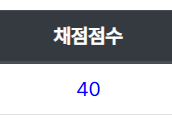